In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/spellchecker_dataset.tsv', sep='\t')

In [3]:
df

,trash,clean
0,"Шунда ук әсәйемдең тоҡсайын, төйөнсөктәрен күҙ...","Шунда уҡ әсәйемдең тоҡсайын, төйөнсөктәрен күҙ..."
1,Унан беҙ өсөбөҙ ҙә ултырғыстарға ултырабыҙ.,Унан беҙ әсәбеҙ ҙә ултырғыстарға ултырабыҙ.
2,"«Иҫән-Һау ғына тороғоҙ инде», - тип бышылдай у...","«Иҫән-һау ғына тороғоҙ инде», - тип бышылдай у..."
3,"Минең генә бер кешем дә юҡ, тип шунда уҡ танау...","Минең генә бер кешем дә юҡ, - тип шунда уҡ тан..."
4,"Ай йөрөгән, ти, йыл йөрөгән, ти, батыр, ете та...","Ай йөрөгән, ти, йыл йөрөгән, ти, батыр, ете та..."
...,...,...
23886,"Эҫтәрендә бүре үк оломаһа ла, эттәр шыңшый баш...","Эстәрендә бүре үк оломаһа ла, эттәр шыңшый баш..."
23887,Үткән йәйҙә яман томра көндө Кәҙерғол төбәгенд...,Үткән йәйҙә яман томра көндө Ҡәҙерғол төбәгенд...
23888,"Кайтыр алдынан салбарҙы эҙләй башлаһа, таба ал...","Ҡайтыр алдынан салбарҙы эҙләй башлаһа, таба ал..."
23889,Кыш урталарында бер көн Әбдрәшит ат аҙбарынан ...,Ҡыш урталарында бер көн Әбдрәшит ат аҙбарынан ...


In [4]:
import textdistance
import re

In [5]:
def preprocess(text):
    # remove repeating spaces, because they are a typographic ussue, not an orthographic one
    text = re.sub(' +', ' ', text)
    return text

In [6]:
df['trash2'] = df.trash.apply(preprocess)
df['clean2'] = df.clean.apply(preprocess)

In [7]:
textdistance.levenshtein.distance(df.trash[0], df.clean[0])

1

In [8]:
textdistance.levenshtein.normalized_distance(df.trash[0], df.clean[0])

0.015384615384615385

In [9]:
df['distance'] = df.apply(lambda row: textdistance.levenshtein.distance(row.trash2, row.clean2), axis=1)

In [10]:
df['normalized_distance'] = df.apply(lambda row: textdistance.levenshtein.normalized_distance(row.trash2, row.clean2), axis=1)

In [11]:
df.describe()

,distance,normalized_distance
count,23891.000000,23891.000000
mean,1.355992,0.018004
std,1.914227,0.020784
min,0.000000,0.000000
25%,1.000000,0.004444
50%,1.000000,0.012579
75%,2.000000,0.024096
max,57.000000,0.300000


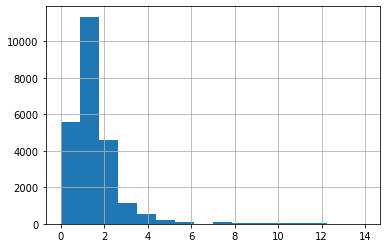

In [13]:
m = 15
df.distance[df.distance<m].hist(bins=m+1);

In [14]:
pd.options.display.max_colwidth = 500
pd.options.display.max_rows = 100

In [16]:
df[df.normalized_distance > 0.2]

,trash,clean,trash2,clean2,distance,normalized_distance
1626,(1 . .7 ).,( 1. . ).,(1 . .7 ).,( 1. . ).,3,0.30
1627,(1.,(1 .,(1.,(1 .,1,0.25


### Look at the most common edits

In [22]:
import difflib

In [101]:
def get_edits(text1, text2, verbose=False):
    edits = []
    last_edit = ' '  # space, - or +
    for item in difflib.ndiff(text1, text2):
        diff_type, char = item[0], item[2]
        if verbose:
            print(item)
        if diff_type != ' ':
            if last_edit == ' ':
                edits.append(['', ''])
            if diff_type == '-':
                edits[-1][0] = edits[-1][0] + char
            elif diff_type == '+':
                edits[-1][1] = edits[-1][1] + char
        last_edit = diff_type
    return [tuple(t) for t in edits]

In [114]:
import random
row = df.sample(1).iloc[0]
row

trash                       Ул үтекләгән күлдәкте килтерһә, герцог, ҡәнәғәтһеҙлеген күрһәтеп, танауын сира, пырхылдай, шыңшый, шунан, шкаф башына менеп, бөтә өйгә аҡыра: - Ярҙам итегеҙ, үләм!
clean                  Ул үтекләгән күлдәкте килтерһә, герцог, ҡәнәғәтһеҙлеген күрһәтеп, танауын сира, пырхылдай, шыңшый, шунан, шкаф башына менеп, бөтә өйгә аҡыра:      - Ярҙам итегеҙ, үләм!
trash2                      Ул үтекләгән күлдәкте килтерһә, герцог, ҡәнәғәтһеҙлеген күрһәтеп, танауын сира, пырхылдай, шыңшый, шунан, шкаф башына менеп, бөтә өйгә аҡыра: - Ярҙам итегеҙ, үләм!
clean2                      Ул үтекләгән күлдәкте килтерһә, герцог, ҡәнәғәтһеҙлеген күрһәтеп, танауын сира, пырхылдай, шыңшый, шунан, шкаф башына менеп, бөтә өйгә аҡыра: - Ярҙам итегеҙ, үләм!
distance                                                                                                                                                                                      0
normalized_distance                     

In [115]:
print(get_edits(row.trash2, row.clean2))

[]


weird edit types:
* insert more than 1 or 2 characters
* delete many characters

In [116]:
from tqdm.auto import tqdm, trange

In [118]:
all_edits = [get_edits(row.trash2, row.clean2) for row in tqdm(df.itertuples(), total=df.shape[0])]

  0%|          | 0/23891 [00:00<?, ?it/s]

In [119]:
from collections import Counter

In [120]:
cnt = Counter(edit for pack in all_edits for edit in pack)

In [123]:
cnt.most_common(100)

[(('', ' '), 2257),
 (('', '-'), 2057),
 ((' ', ''), 1304),
 (('', '- '), 1102),
 (('г', 'ғ'), 1028),
 (('һ', 'Һ'), 962),
 (('К', 'Ҡ'), 910),
 (('', ' -'), 657),
 (('е', 'ы'), 612),
 (('ә', 'а'), 564),
 (('ә', 'э'), 403),
 (('ә', 'ө'), 391),
 (('*', ''), 345),
 ((',', ''), 308),
 (('Ь', 'Һ'), 308),
 (('ю', 'йү'), 291),
 (('-', ''), 278),
 (('.', ''), 271),
 (('Һ', 'һ'), 236),
 (('к', 'ҡ'), 203),
 (('н', 'ң'), 201),
 (('', ' - '), 197),
 (('о', 'ө'), 185),
 (('п', 'н'), 178),
 ((' .', ''), 166),
 (('Э', 'Ә'), 163),
 (('ғ', 'г'), 160),
 (('ц', 'ң'), 155),
 (("'", ''), 146),
 (('ъ', 'ғ'), 140),
 (('И', 'Й'), 137),
 (('у', 'ү'), 128),
 (('* ', ''), 126),
 (('гә', 'ға'), 123),
 (('К', 'Һ'), 119),
 (('ң', 'н'), 118),
 (('ө', 'ә'), 110),
 (('э', 'ә'), 103),
 (('к', '*'), 89),
 (('н', 'п'), 88),
 (('*', ','), 87),
 (('1', ''), 83),
 (('г', 'т'), 82),
 (('«', ''), 81),
 (('', ','), 80),
 (('»', ''), 79),
 (('Н', 'Һ'), 79),
 (('ө', 'о'), 77),
 (('ҡ', 'к'), 76),
 (('и', 'н'), 68),
 (('ҙ', 'з'), 6

In [160]:
edit = (',', '')
ids = [i for i, edits in enumerate(all_edits) if edit in edits]
print(len(ids))

297


In [162]:
idx = random.choice(ids)
row = df.iloc[idx]
row

trash                  Юҡ инде, Уразғол үҙенең, тауҙағы был ҡәһәрле яҙмышын үҙгәртергә һис бер төрлө сара таба алмаясаҡ: төндә бүрәнәләрҙе алып китер өсөн машина бөгөн үк кис килеп етергә тейеш.
clean                   Юҡ инде, Уразғол үҙенең тауҙағы был ҡәһәрле яҙмышын үҙгәртергә һис бер төрлө сара таба алмаясаҡ: төндә бүрәнәләрҙе алып китер өсөн машина бөгөн үк кис килеп етергә тейеш.
trash2                 Юҡ инде, Уразғол үҙенең, тауҙағы был ҡәһәрле яҙмышын үҙгәртергә һис бер төрлө сара таба алмаясаҡ: төндә бүрәнәләрҙе алып китер өсөн машина бөгөн үк кис килеп етергә тейеш.
clean2                  Юҡ инде, Уразғол үҙенең тауҙағы был ҡәһәрле яҙмышын үҙгәртергә һис бер төрлө сара таба алмаясаҡ: төндә бүрәнәләрҙе алып китер өсөн машина бөгөн үк кис килеп етергә тейеш.
distance                                                                                                                                                                                         1
normalized_distance      

In [137]:
get_edits(row.trash2, row.clean2)

[('', '-'), ('Һ', 'һ')]

Most common edits:
* Insert space: usually, it is adjustent to punctuation marks, so it does not change the words).
* Insert hyphen: it often splits long words; probably, this fixes the hyphens before the line break that were erroneously removed.
* Remove space: this usually joins adjustent words that were erroneously broken apart.
* Replace similar letter 1,2, or 3-gram (e.g. К->Ҡ, ә->ө, ю->йү, гә->ға, нд->ңл, пгг->шт, пгк->шҡ): most of them are real OCR errors, but some seem to be also referring to orthography, because they replace similarly sounding things.
* Remove various punctuation marks: some of these edits are, probably, just a result of visual noise, but often the initial punctuation seems non-random.

What about long edits?
* when the length of the target or source substitution is more than 3, it is almost always trash.
* when the difference between the lengths of replaced segments is 0 or 1, they are mostly correct.
* when difference is 2, they usually remove digits or punctuation, which is usually correct.
* when the difference is more than 1 (counting only letters), most of the replacements are trash (or changes in the word morphology, such as adding a Bashkir ending to a Russian word).

In [172]:
all_chars = ''.join(c for c, _ in Counter(c for text in df.trash2 for c in text).most_common())
all_chars

" анәыертлимҡукйҙб,оспһдшөғ.гүң-ях:ҫБвэ!зКфМАТУю?ҠжӘС«»ИьШХНчцДЙП*РЛҺЗЭЯЕОГъҒ;1ЮВҮӨЬ'(Ф)Ыe^щ49irI7notusdlҘcVXhmbvҢfgSMTjULJAPҪCRQEDHFx%WkwzNqGBYOK"

In [174]:
punct_chars = ',.-:!?«»*;\'()^%"'

In [177]:
def letters_only(text):
    return ''.join(c for c in text if c not in punct_chars and not c.isnumeric() and c!= ' ')

In [180]:
letters_only("' - ")

''

In [189]:
for edit, count in cnt.most_common():
    e1, e2 = edit[0], edit[1]
    e1_, e2_ = letters_only(e1), letters_only(e2)
    if abs(len(e1_) - len(e2_)) > 1:
        print(edit, count)

('', 'ты') 10
('is', '*') 3
('ты', '') 3
('', 'IX ') 2
('', 'XII ') 2
('', ' ине') 2
('', '4 бит. ') 2
(' - һаумыһығыҙ.', '') 2
('ын', '') 2
('', ' END') 2
('', 'лар') 2
('гә', '') 2
('', 'лә ') 2
(' - һы...', '') 2
('Эйе шул. һ', 'Һ') 1
('^', 'ла') 1
(' - һаташма!', '') 1
('', 'шҡа һикере') 1
('', ' уйнаған ҡыр кәзәләре, яҙғы шарлауыҡтарҙан көҙ') 1
('к', 'ө ҡыр') 1
('', 'уҙарға тиклем тынмай') 1
('икереп уйнаған ҡыр кәзәләре, яҙғы шарлауыҡтарҙан көҙгө ҡырауҙарға тиклем тынмай һ', '') 1
('', 'иптә') 1
('ггәпгг', 'т') 1
('', 'са мөрйәһенең осона ҡуйылған ҡалай торбаны атып төшөрөргә лә, уң күрше Сабирҙарҙың нигеҙ өйөмөндә торған балсыҡ көршәкте ватырға ла, һул күрше Йомабикә ҡарсыҡтың үлән ө') 1
('а мөрйәһенең осона ҡуйылған ҡалай ', '') 1
('орбаны атып төшөрөргә лә, уң күрше Сабирҙарҙың нигеҙ өйөм', '') 1
('торған балсыҡ көршәкте ватырға ла, һул күрше Йомабикә ҡарсыҡтың үлән өҫтөндә ', '') 1
('Әллә. - һ', 'Һ') 1
('цды ме', '') 1
('', 'мең Әә ') 1
('гиаг', 'шғ') 1
('', 'АЛДА - ') 1
('',

In [191]:
for edit, count in cnt.most_common():
    e1, e2 = edit[0], edit[1]
    e1_, e2_ = letters_only(e1), letters_only(e2)
    if max(len(e1_), len(e2_)) > 3:
        print(edit, count)

(' - һаумыһығыҙ.', '') 2
('Эйе шул. һ', 'Һ') 1
(' - һаташма!', '') 1
('', 'шҡа һикере') 1
('', ' уйнаған ҡыр кәзәләре, яҙғы шарлауыҡтарҙан көҙ') 1
('к', 'ө ҡыр') 1
('', 'уҙарға тиклем тынмай') 1
('икереп уйнаған ҡыр кәзәләре, яҙғы шарлауыҡтарҙан көҙгө ҡырауҙарға тиклем тынмай һ', '') 1
('', 'иптә') 1
('ггәпгг', 'т') 1
('', 'са мөрйәһенең осона ҡуйылған ҡалай торбаны атып төшөрөргә лә, уң күрше Сабирҙарҙың нигеҙ өйөмөндә торған балсыҡ көршәкте ватырға ла, һул күрше Йомабикә ҡарсыҡтың үлән ө') 1
('а мөрйәһенең осона ҡуйылған ҡалай ', '') 1
('орбаны атып төшөрөргә лә, уң күрше Сабирҙарҙың нигеҙ өйөм', '') 1
('торған балсыҡ көршәкте ватырға ла, һул күрше Йомабикә ҡарсыҡтың үлән өҫтөндә ', '') 1
('Әллә. - һ', 'Һ') 1
('цды ме', '') 1
('', 'мең Әә ') 1
('гиаг', 'шғ') 1
('', 'АЛДА - ') 1
('', 'Яҙ килде! ') 1
('төймәкәй ', 'ТӨ') 1
('', 'МӘКӘЙ Й') 1
('о о и «J и ', '') 1
('киня', 'ҡта') 1
('Ленин! һ', 'Һ') 1
('', 'итах отражал тянувшуюся веками борьбу за свободу, мечты об облегчении тяжело') 1
(

In [192]:
edit = ' - һаумыһығыҙ.', ''
ids = [i for i, edits in enumerate(all_edits) if edit in edits]
print(len(ids))

2


In [193]:
idx = random.choice(ids)
row = df.iloc[idx]
row

trash                  Әйдә, әйдә, керегеҙ, - ишек эргәһендәге бауға ниҙер элеп йөрөгән Сажидә уға ялт итеп күҙ һирпеп алды, саф, татарса яуап ҡайтарҙы. - һаумыһығыҙ.
clean                                Әйдә, әйдә, керегеҙ, - ишек эргәһендәге бауға ниҙер элеп йөрөгән Сажидә уға ялт итеп күҙ һирпеп алды, саф, татарса яуап ҡайтарҙы.
trash2                 Әйдә, әйдә, керегеҙ, - ишек эргәһендәге бауға ниҙер элеп йөрөгән Сажидә уға ялт итеп күҙ һирпеп алды, саф, татарса яуап ҡайтарҙы. - һаумыһығыҙ.
clean2                               Әйдә, әйдә, керегеҙ, - ишек эргәһендәге бауға ниҙер элеп йөрөгән Сажидә уға ялт итеп күҙ һирпеп алды, саф, татарса яуап ҡайтарҙы.
distance                                                                                                                                                            14
normalized_distance                                                                                                                                          0.097902

In [204]:
random.seed(1)
df['split'] = random.choices(['train', 'dev', 'test'], weights=[0.6, 0.2, 0.2], k=df.shape[0])

In [205]:
df.split.value_counts()

train    14382
test      4807
dev       4702
Name: split, dtype: int64

In [ ]:
e1_, e2_ = letters_only(e1), letters_only(e2)
    if max(len(e1_), len(e2_)) > 3:

In [209]:
max([], default=0)

0

In [220]:
df['edit_max_cldiff'] = [
    max([max(len(letters_only(e[0])), len(letters_only(e[1]))) for e in row], default=0) 
    for row in all_edits
] # when it is > 3, this is often bad

df['edit_max_lendiff'] = [
    max([abs(len(letters_only(e[0])) - len(letters_only(e[1]))) for e in row], default=0) 
    for row in all_edits
]  # when it is > 1, this is often bad

In [221]:
df[df.edit_max_lendiff > 1].sample(3)

,trash,clean,trash2,clean2,distance,normalized_distance,split,edit_max_cldiff,edit_max_lendiff
7982,"I IQH- I СП I Тыуғандан алып, Саров монастырына килгәнгә тиклем Серафим атаның тыуған ере.","I Тыуғандан алып, Саров монастырына килгәнгә тиклем Серафим атаның тыуған ере.","I IQH- I СП I Тыуғандан алып, Саров монастырына килгәнгә тиклем Серафим атаның тыуған ере.","I Тыуғандан алып, Саров монастырына килгәнгә тиклем Серафим атаның тыуған ере.",12,0.133333,dev,7,7
21216,"Ахырҙа, ул түңәрәлтеп саба кереште, түңәрәк аҡрынлап бәләкәйләнер һәм бө Заказ 4 9 зз төр, шул сағында баш һуҡҡан яҡҡа атылырмын, тип уйланы.","Ахырҙа, ул түңәрәлтеп саба кереште, түңәрәк аҡрынлап бәләкәйләнер һәм бөтөр, шул сағында баш һуҡҡан яҡҡа атылырмын, тип уйланы.","Ахырҙа, ул түңәрәлтеп саба кереште, түңәрәк аҡрынлап бәләкәйләнер һәм бө Заказ 4 9 зз төр, шул сағында баш һуҡҡан яҡҡа атылырмын, тип уйланы.","Ахырҙа, ул түңәрәлтеп саба кереште, түңәрәк аҡрынлап бәләкәйләнер һәм бөтөр, шул сағында баш һуҡҡан яҡҡа атылырмын, тип уйланы.",14,0.099291,test,7,7
16203,"«Ҡармаҡтың ырғағы йөрәгеңә ҡаҙалып үлтерерлек итеп аша, - тип уйланы ул. - Үҙең ҡалҡып сыҡ та миңә гарпун менән сәнсергә ирек бир. һин әҙерме?","«Ҡармаҡтың ырғағы йөрәгеңә ҡаҙалып үлтерерлек итеп аша, - тип уйланы ул. - Үҙең ҡалҡып сыҡ та миңә гарпун менән сәнсергә ирек бир.","«Ҡармаҡтың ырғағы йөрәгеңә ҡаҙалып үлтерерлек итеп аша, - тип уйланы ул. - Үҙең ҡалҡып сыҡ та миңә гарпун менән сәнсергә ирек бир. һин әҙерме?","«Ҡармаҡтың ырғағы йөрәгеңә ҡаҙалып үлтерерлек итеп аша, - тип уйланы ул. - Үҙең ҡалҡып сыҡ та миңә гарпун менән сәнсергә ирек бир.",12,0.084507,dev,9,9


In [216]:
df['edit_max_lendiff'].value_counts()

0      22241
1       1167
2        104
3         59
5         40
4         35
6         28
7         24
8         22
11        15
10        12
12        12
9         11
13         8
14         7
19         6
15         6
18         5
17         5
16         4
21         3
68         3
67         3
41         3
24         3
30         3
126        2
139        2
27         2
23         2
20         2
57         2
40         2
70         2
56         2
62         1
61         1
77         1
66         1
36         1
52         1
82         1
91         1
110        1
84         1
161        1
81         1
65         1
49         1
142        1
111        1
80         1
64         1
127        1
45         1
124        1
180        1
60         1
58         1
219        1
121        1
73         1
28         1
25         1
44         1
120        1
143        1
423        1
388        1
135        1
103        1
71         1
76         1
198        1
54         1
108        1
117        1

In [858]:
df.describe()

,distance,normalized_distance,edit_max_cldiff,edit_max_lendiff
count,23891.000000,23891.000000,23891.000000,23891.000000
mean,1.355992,0.018004,0.840777,0.425432
std,1.914227,0.020784,6.285220,6.278389
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.004444,0.000000,0.000000
50%,1.000000,0.012579,0.000000,0.000000
75%,2.000000,0.024096,1.000000,0.000000
max,57.000000,0.300000,423.000000,423.000000


# Save the filtered edits

In [222]:
df.to_csv('../data/spellchecker_dataset_split.tsv', sep='\t', index=None)


# The model of noise

How we add noise to the given text:
1. Identify the ngrams (up to 3) in the input that can be replaced. 
2. Choose among them proportionally to their edit probability.

In [228]:
new_priors = Counter()
for edit, c in cnt.most_common():
    old, new = edit
    new_priors[new] = 0
print(len(new_priors))

809


In [229]:
for text in tqdm(df.clean2):
    for new in new_priors.keys():
        new_priors[new] += text.count(new)

  0%|          | 0/23891 [00:00<?, ?it/s]

In [230]:
new_priors.most_common(30)

[('', 2455813),
 (' ', 334929),
 ('а', 210143),
 ('н', 138968),
 ('ы', 133132),
 ('ә', 131467),
 ('е', 129326),
 ('р', 114931),
 ('т', 111225),
 ('л', 110839),
 ('и', 68102),
 ('м', 55492),
 ('ҡ', 55113),
 ('у', 54087),
 ('к', 53203),
 ('й', 49634),
 ('ҙ', 48523),
 ('б', 47731),
 (',', 42515),
 (', ', 42504),
 ('о', 40010),
 ('с', 38337),
 ('п', 36805),
 ('д', 36777),
 ('һ', 36038),
 (' т', 35965),
 ('ғ', 35185),
 ('ш', 34984),
 ('ө', 34346),
 ('ан', 30140)]

In [846]:
from collections import defaultdict, Counter

edit_total_proba = Counter()
new2olds = defaultdict(Counter)
deletions_cnt = Counter()

n_tot, n_delete, n_insert = 0, 0, 0

for edit, c in cnt.most_common():
    old, new = edit
    old2, new2 = letters_only(old), letters_only(new)
    if max(len(old2), len(new2)) > 3 or abs(len(old2) - len(new2)) > 1:
        continue
    n_tot += c
    n_delete += c * (new=='')
    n_insert += c * (old=='')
    edit_total_proba[new] += c
    new2olds[new][old] += c
    if new == '':
        deletions_cnt[old] += c
    
edit_total_proba = Counter({k: (v+1) / (new_priors[k] + 2) for k, v in edit_total_proba.items()})
char_prior = Counter(c for text in df['trash2'] for c in text)

In [541]:
print(n_tot, n_delete, n_insert, n_delete/n_tot)

22920 4203 6678 0.18337696335078535


In [534]:
len(edit_total_proba), len(new2olds)

(368, 368)

In [853]:
text = random.choice(df.clean2)
print(text)

Йома дошманға атҡан арала, мин кеҫәмдән бәке сығарҙым да әсирҙең аяғы-ҡулы бәйләнгән бауҙарҙы ҡырҡырға керештем.


In [870]:
import json
import random

def findall(haystack, needle):
    first_ids = []
    i = haystack.find(needle)
    while i != -1:
        first_ids.append(i)
        i = haystack.find(needle, i+1)
    return first_ids


class Noiser():
    def __init__(self, deletions_cnt=None, new2olds=None, edit_total_proba=None, char_prior=None):
        self.deletions_cnt = deletions_cnt
        self.new2olds = new2olds
        self.edit_total_proba = edit_total_proba
        self.char_prior = char_prior
    
    def save(self, path):
        with open(path, 'w') as f:
            json.dump(
                {
                    'deletions_cnt': self.deletions_cnt, 
                    'new2olds': self.new2olds, 
                    'edit_total_proba': self.edit_total_proba, 
                    'char_prior': self.char_prior,
                }, 
                f, 
                ensure_ascii=False, indent=1
            )
    
    @classmethod
    def load(cls, path):
        with open(path, 'r') as f:
            data = json.load(f)
        return cls(
            deletions_cnt=data['deletions_cnt'],
            new2olds=data['new2olds'],
            edit_total_proba=data['edit_total_proba'],
            char_prior=data['char_prior'],
        )
    
    def add_noise(self, text, min_edits=1, max_edits=10, p_exit=None, p_insert=0.18, temp=0.3, p_randchar=0.05, edit_rate=0.02):
        if p_exit is None:
            p_exit = 1 / (max(2, len(text)) * edit_rate)
        # replacing a random character (including deletions)
        candidates = [text[i:i+n] for n in range(1, 4) for i in range(len(text)-n+1)]
        cand_weights = [self.edit_total_proba.get(c, 0) ** temp for c in candidates]
        n_edits = 0
        for i in range(max_edits):
            if random.random() < p_randchar:
                rep = random.choices(
                    list(self.char_prior.keys()), weights=list(self.char_prior.values())
                )[0]
                idx = random.randint(0, len(text)-1)
                text = text[:idx] + rep + text[idx + 1:]
            elif random.random() < p_insert:
                idx = random.randint(0, len(text))
                insertion = random.choices(list(self.deletions_cnt.keys()), weights=list(self.deletions_cnt.values()))[0]
                text = text[:idx] + insertion +  text[idx:]
                n_edits += 1
            else:
                choice = random.choices(candidates, weights=cand_weights)[0]
                if choice not in text:
                    continue
                idx = random.choice(findall(text, choice))
                replacement = random.choices(list(self.new2olds[choice].keys()), weights=list(self.new2olds[choice].values()))[0]
                text = text[:idx] + replacement +  text[idx + len(choice):]
                n_edits += 1
            if n_edits >= min_edits and random.random() < p_exit:
                break
        return text

In [871]:
noiser = Noiser(deletions_cnt, new2olds, edit_total_proba, char_prior)

In [872]:
print(text)
print(noiser.add_noise(text))

Йома дошманға атҡан арала, мин кеҫәмдән бәке сығарҙым да әсирҙең аяғы-ҡулы бәйләнгән бауҙарҙы ҡырҡырға керештем.
Йома дошманға атҡан арала, мин кеҫәмдән бәке сығарҙым дә әсирҙең аяғы-ҡулы бәйләнгән бауҙарҙы ҡырҡырға керештем.


In [873]:
noiser.save('noise_model_v1.json')